# Daniel Ricciardo

<img src="https://www.formula1.com/content/fom-website/en/drivers/daniel-ricciardo/_jcr_content/image.img.1920.medium.jpg/1646818924510.jpg" width="300">

### Team: McLaren

<img src ="https://www.formula1.com/content/fom-website/en/drivers/daniel-ricciardo/_jcr_content/helmet.img.png/1646824802474.png" width="200">


In [1]:
library (tidyverse)
library (tidymodels)
source("source/master_functions.r")
source("source/regression.r")
source("source/prediction.r")
set.seed(620)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

Warning message:
“package ‘tidyr’ was built under R version 4.1.2”
Warning message:
“package ‘readr’ was built under R version 4.1.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'tune':
  method                   from   
  required_pkgs.model_spec parsnip

── Attaching packages ────────────────────────────────────── tidymodels 0.1.3 ──

✔ broom        0.7.12     ✔ rsample      0.1.1 
✔ dials        0.1.0      ✔ tune         0.1.6 
✔ infer        1.0.0      ✔ workflows    0.2.4 
✔ modeldata    0.1.1      ✔ workflowsets 0.1.0 
✔ parsnip      0.1.7      ✔ yardstick    0.0.9 
✔ recipes      0.1.17     

Warning message

In [2]:
initialize_master()

Rows: 79 Columns: 9

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): circuitRef, name, location, country, alt, url
dbl (3): circuitId, lat, lng


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 12716 Columns: 7

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): positionText
dbl (6): constructorStandingsId, raceId, constructorId, points, position, wins


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 11950 Columns: 5

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): status
dbl (4): constructorResultsId, raceId, constructorId, points


ℹ Use `spec()` to retrieve the full column specification for this

In [3]:
# Filtering Lap Data For 2022 Drivers

lap_data <- lap_times %>%
            filter(driverId %in% driver_ids) %>%
            filter(raceId %in% race_ids)

# Filtering Lap Data For Individual Driver

ric_laps <- lap_data %>%
            filter(driverId == 817)

# Season Analysis

In [4]:
rmse_col <- data.frame(.metric = character(), .estimator = character(), .estimate = double(), Round = double(), stringsAsFactors=FALSE) 

racetime_col <- data.frame(race_time_milliseconds = double(), race_time_mins = double(), race_time_hrs = double()) 

rmse_col

racetime_col

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>


race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>


`geom_smooth()` using formula 'y ~ x'



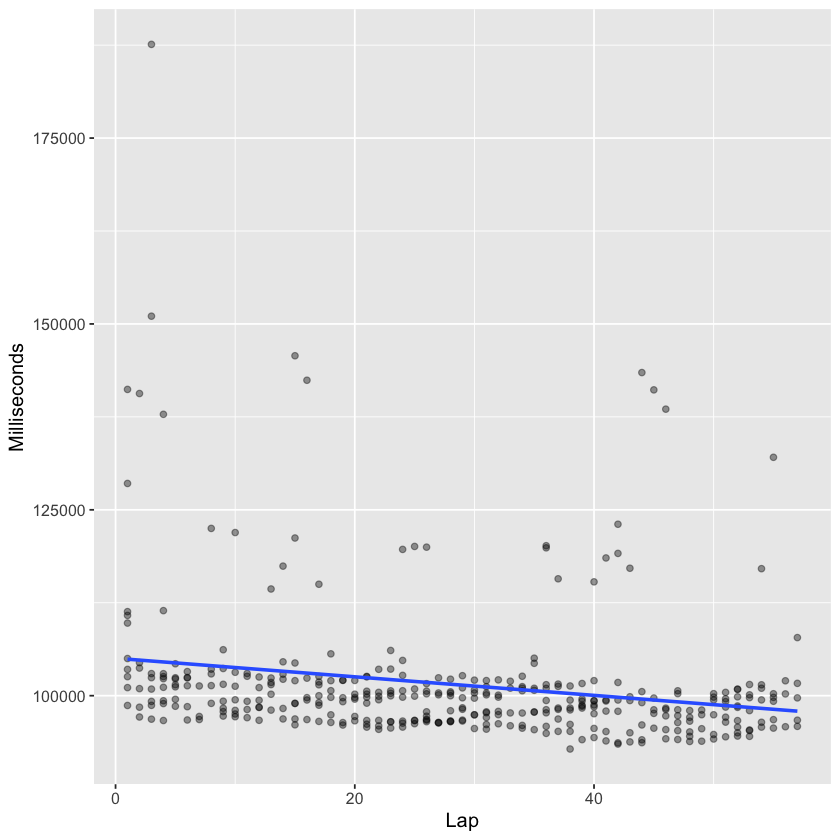

In [5]:
set.seed(2022)

#1. Bahrain 

dr_bahrain <- ric_laps %>%
                filter(raceId %in% bahrain_race_ID) 

dr_bahrain_clean <- dr_bahrain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))

dr_bahrain_clean_ID <- dr_bahrain_clean %>%
                        pull(raceId)


### SPLITTING DATA

dr_bahrain_races <- ric_laps %>%
                    filter(raceId %in% dr_bahrain_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(dr_bahrain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 1

initiate_rmse() 

### GETS PREDICTION

get_bahrain_prediction()

raceId,n
<dbl>,<int>
1054,66
1042,65


`geom_smooth()` using formula 'y ~ x'



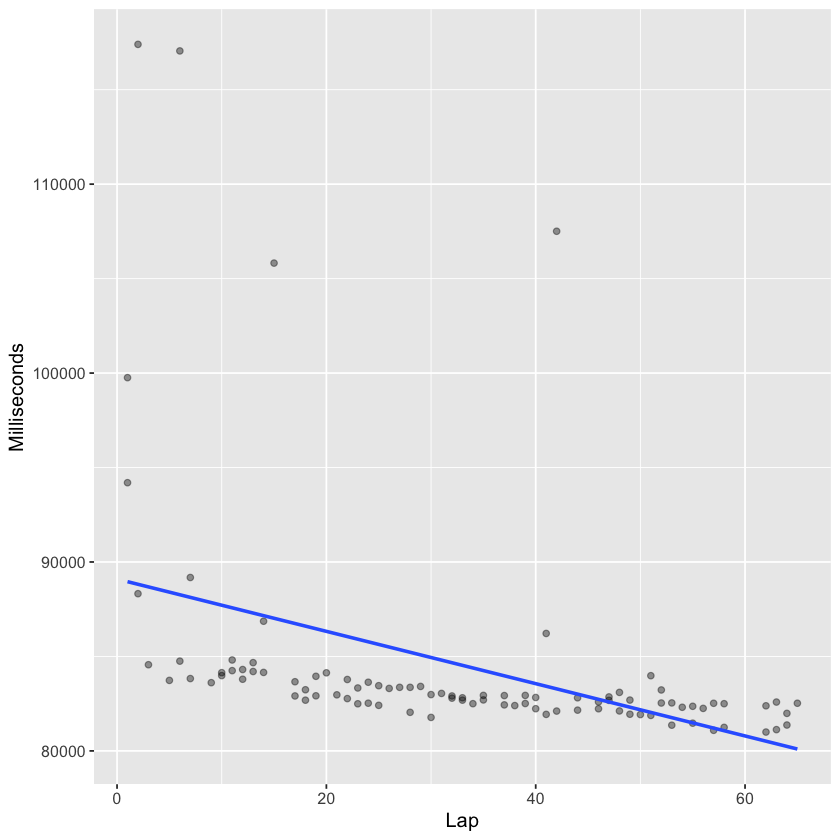

In [6]:
set.seed(2022)

#2. Portimão

dr_Portimão <- ric_laps %>%
                filter(raceId %in% Portimão_race_ID) 

dr_Portimão_drean <- dr_Portimão %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
dr_Portimão_drean
dr_Portimão_drean_ID <- dr_Portimão_drean %>%
                        pull(raceId)


### SPLITTING DATA

dr_Portimão_races <- ric_laps %>%
                    filter(raceId %in% dr_Portimão_drean_ID) 

formulaone_split <- initial_split(dr_Portimão_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 2

initiate_rmse() 

### GETS PREDICTION

get_Portimão_prediction()

`geom_smooth()` using formula 'y ~ x'



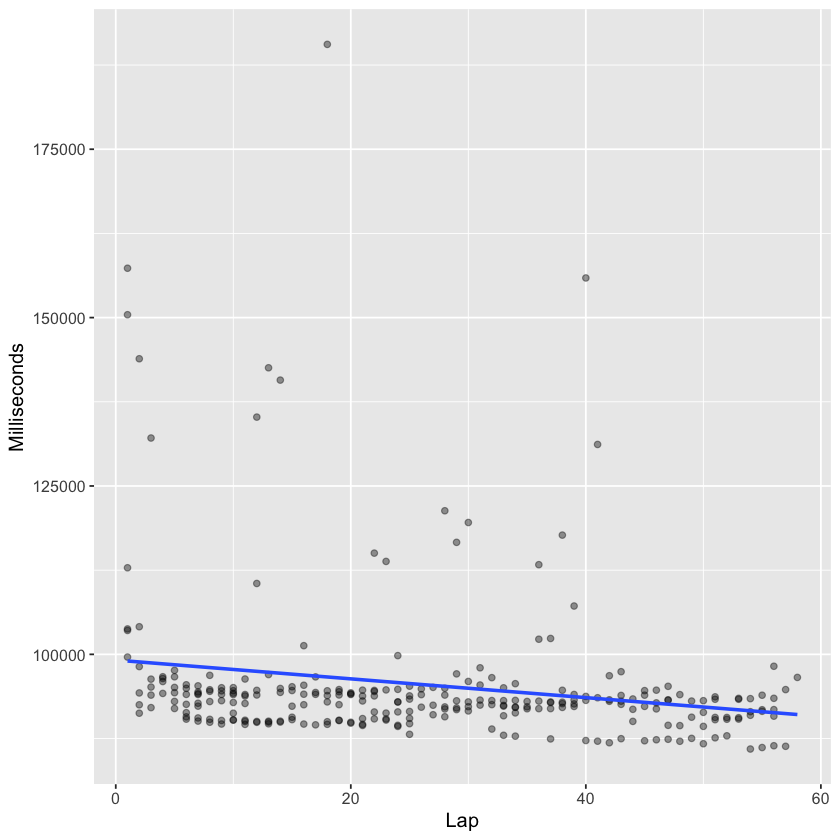

In [7]:
set.seed(2022)

#3. Australia

dr_aus <- ric_laps %>%
                filter(raceId %in% aus_race_ID) 

dr_aus_clean <- dr_aus %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

dr_aus_clean_ID <- dr_aus_clean %>%
                        pull(raceId)


### SPLITTING DATA

dr_aus_races <- ric_laps %>%
                    filter(raceId %in% dr_aus_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(dr_aus_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 3

initiate_rmse() 

### GETS PREDICTION

get_australia_prediction()

`geom_smooth()` using formula 'y ~ x'



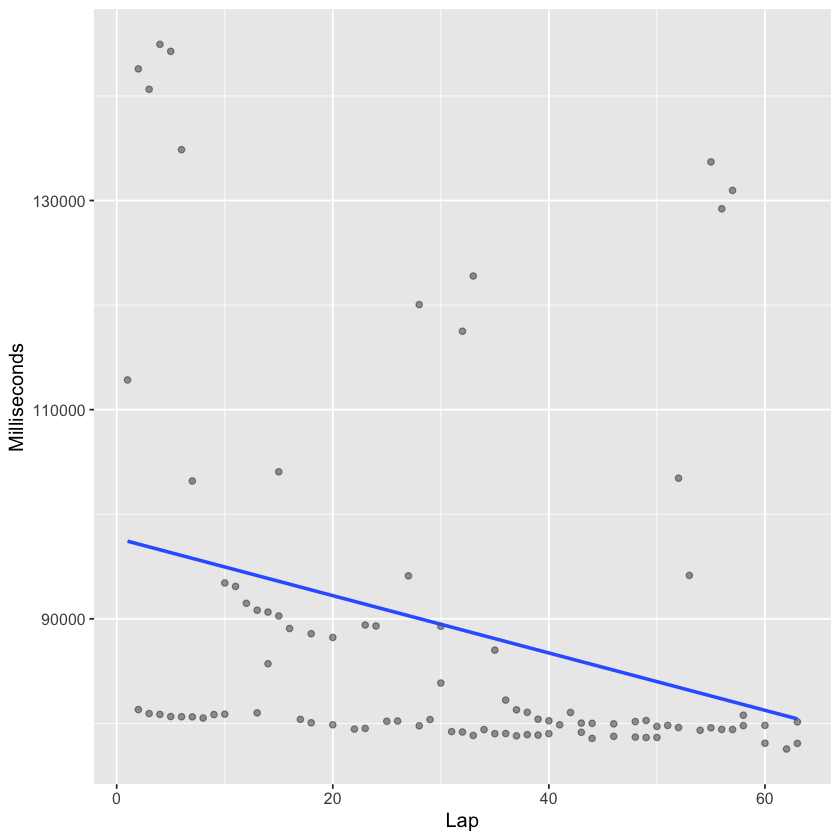

In [8]:
set.seed(2022)

#4. Italy, Imola

dr_imola <- ric_laps %>%
                filter(raceId %in% imola_race_ID) 

dr_imola_clean <- dr_imola %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

dr_imola_clean_ID <- dr_imola_clean %>%
                        pull(raceId)


### SPLITTING DATA

dr_imola_races <- ric_laps %>%
                    filter(raceId %in% dr_imola_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(dr_imola_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 4

initiate_rmse() 

### GETS PREDICTION

get_imola_prediction()

`geom_smooth()` using formula 'y ~ x'



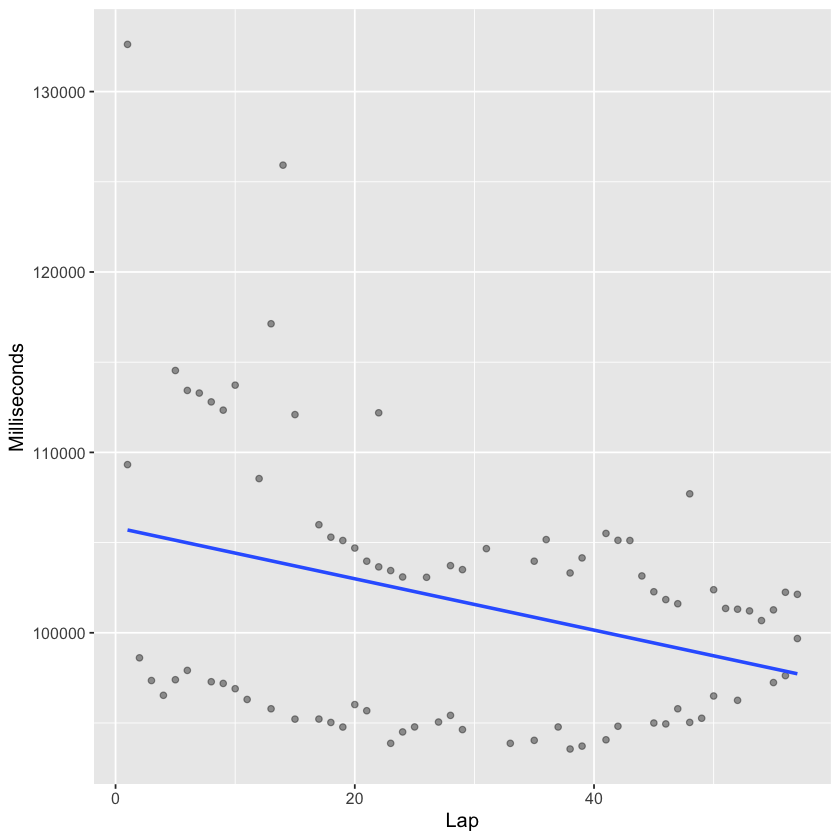

In [9]:
set.seed(2022)

#5. Turkey (Replacing Miami)

dr_turkey <- ric_laps %>%
                filter(raceId %in% turkey_race_ID) 

dr_turkey_clean <- dr_turkey %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

dr_turkey_clean_ID <- dr_turkey_clean %>%
                        pull(raceId)


### SPLITTING DATA

dr_turkey_races <- ric_laps %>%
                    filter(raceId %in% dr_turkey_clean_ID)

formulaone_split <- initial_split(dr_turkey_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 5

initiate_rmse() 

### GETS PREDICTION

get_miami_prediction()

`geom_smooth()` using formula 'y ~ x'



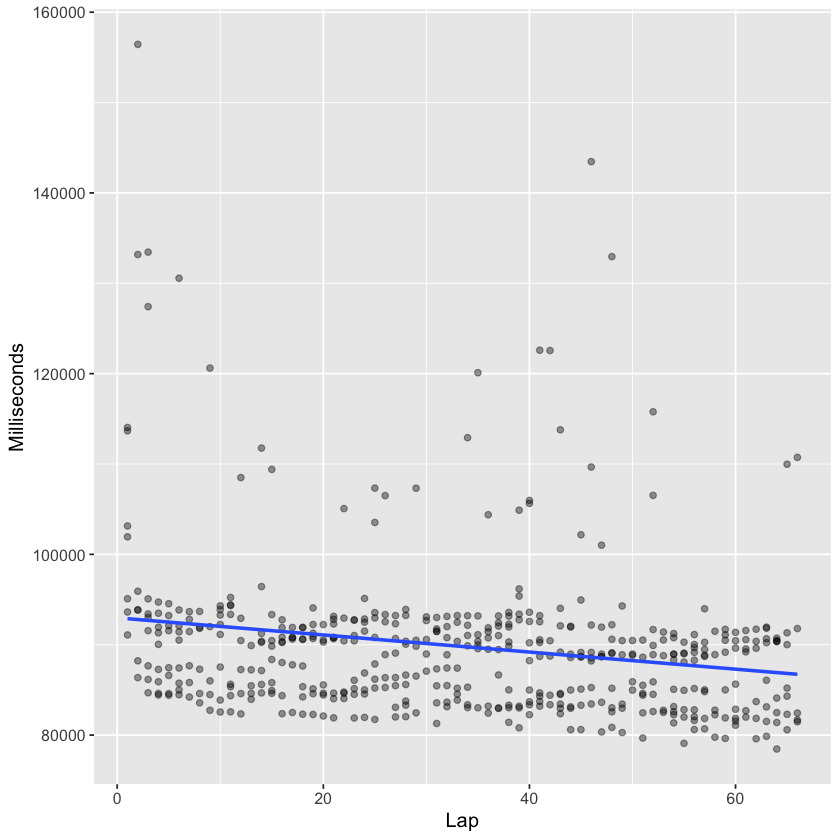

In [10]:
set.seed(2022)

#6. Spain

dr_spain <- ric_laps %>%
                filter(raceId %in% spain_race_ID) 

dr_spain_clean <- dr_spain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

dr_spain_clean_ID <- dr_spain_clean %>%
                        pull(raceId)


### SPLITTING DATA

dr_spain_races <- ric_laps %>%
                    filter(raceId %in% dr_spain_clean_ID)

formulaone_split <- initial_split(dr_spain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 6

initiate_rmse() 

### GETS PREDICTION

get_spain_prediction()

`geom_smooth()` using formula 'y ~ x'



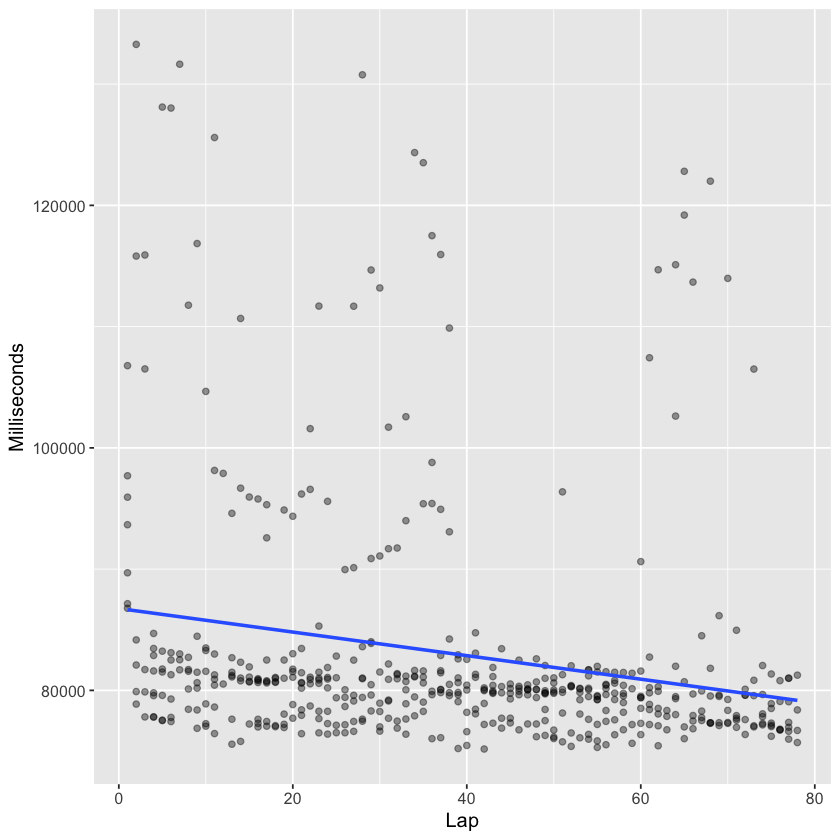

In [11]:
set.seed(2022)

#7. Monaco

dr_monaco <- ric_laps %>%
                filter(raceId %in% monaco_race_ID) 

dr_monaco_clean <- dr_monaco %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

dr_monaco_clean_ID <- dr_monaco_clean %>%
                        pull(raceId)


### SPLITTING DATA

dr_monaco_races <- ric_laps %>%
                    filter(raceId %in% dr_monaco_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(dr_monaco_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 7

initiate_rmse() 

### GETS PREDICTION

get_monaco_prediction()

`geom_smooth()` using formula 'y ~ x'



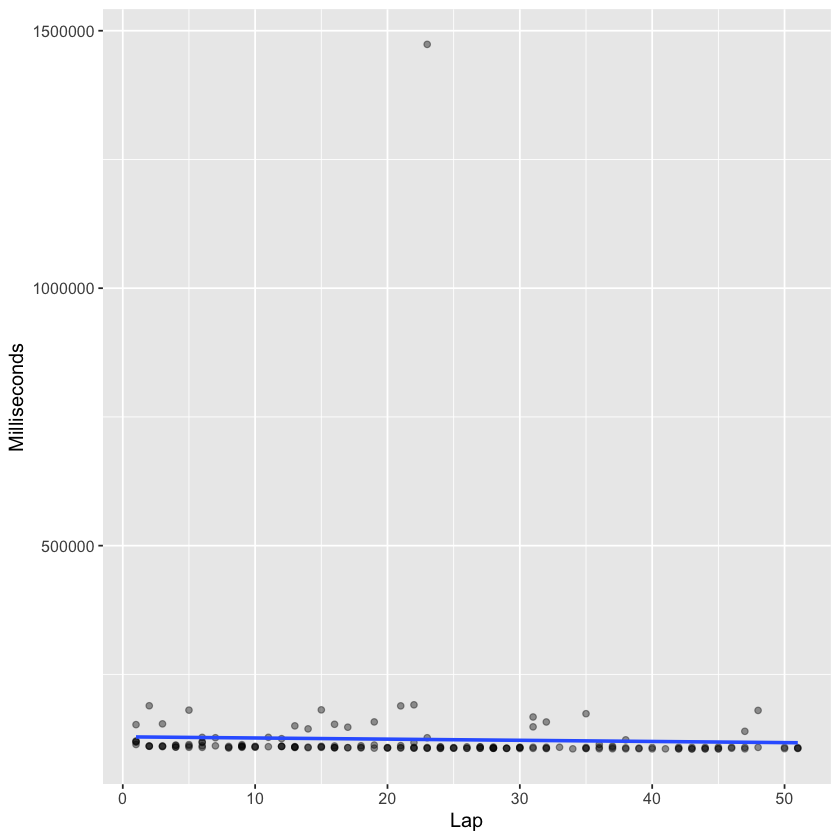

In [12]:
set.seed(2022)

#8. Azerbaijan

dr_azerbaijan <- ric_laps %>%
                filter(raceId %in% azerbaijan_race_ID) 

dr_azerbaijan_clean <- dr_azerbaijan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

dr_azerbaijan_clean_ID <- dr_azerbaijan_clean %>%
                        pull(raceId)


### SPLITTING DATA

dr_azerbaijan_races <- ric_laps %>%
                    filter(raceId %in% dr_azerbaijan_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(dr_azerbaijan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 8

initiate_rmse()  

### GETS PREDICTION

get_azerbaijan_prediction()

`geom_smooth()` using formula 'y ~ x'



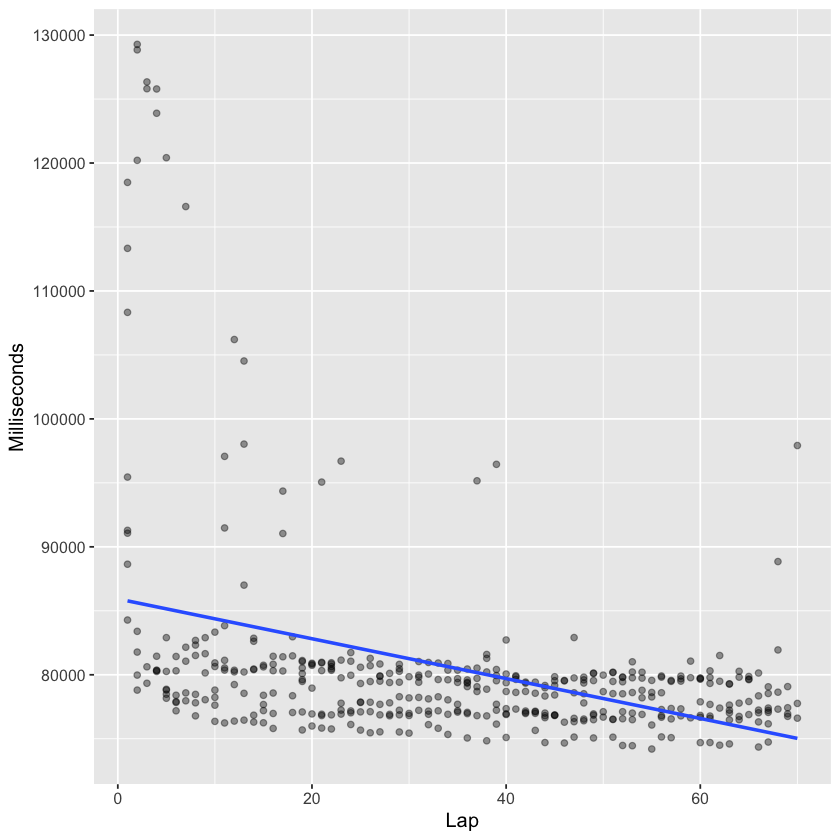

In [13]:
set.seed(2022)

#9. Canada

dr_canada <- ric_laps %>%
                filter(raceId %in% canada_race_ID) 

dr_canada_clean <- dr_canada %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

dr_canada_clean_ID <- dr_canada_clean %>%
                        pull(raceId)


### SPLITTING DATA

dr_canada_races <- ric_laps %>%
                    filter(raceId %in% dr_canada_clean_ID)

formulaone_split <- initial_split(dr_canada_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 9

initiate_rmse() 

### GETS PREDICTION

get_canada_prediction()

`geom_smooth()` using formula 'y ~ x'



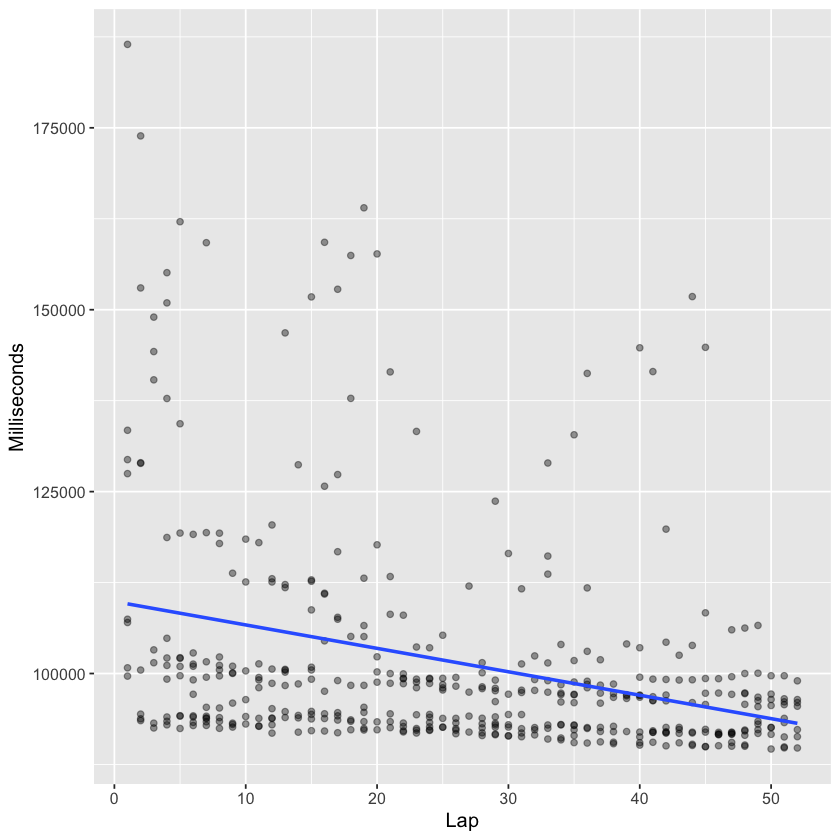

In [14]:
set.seed(2022)

#10. Great Britain

dr_uk <- ric_laps %>%
                filter(raceId %in% uk_race_ID) 

dr_uk_clean <- dr_uk %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

dr_uk_clean_ID <- dr_uk_clean %>%
                        pull(raceId)


### SPLITTING DATA

dr_uk_races <- ric_laps %>%
                    filter(raceId %in% dr_uk_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(dr_uk_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 10

initiate_rmse() 

### GETS PREDICTION

get_uk_prediction()

`geom_smooth()` using formula 'y ~ x'



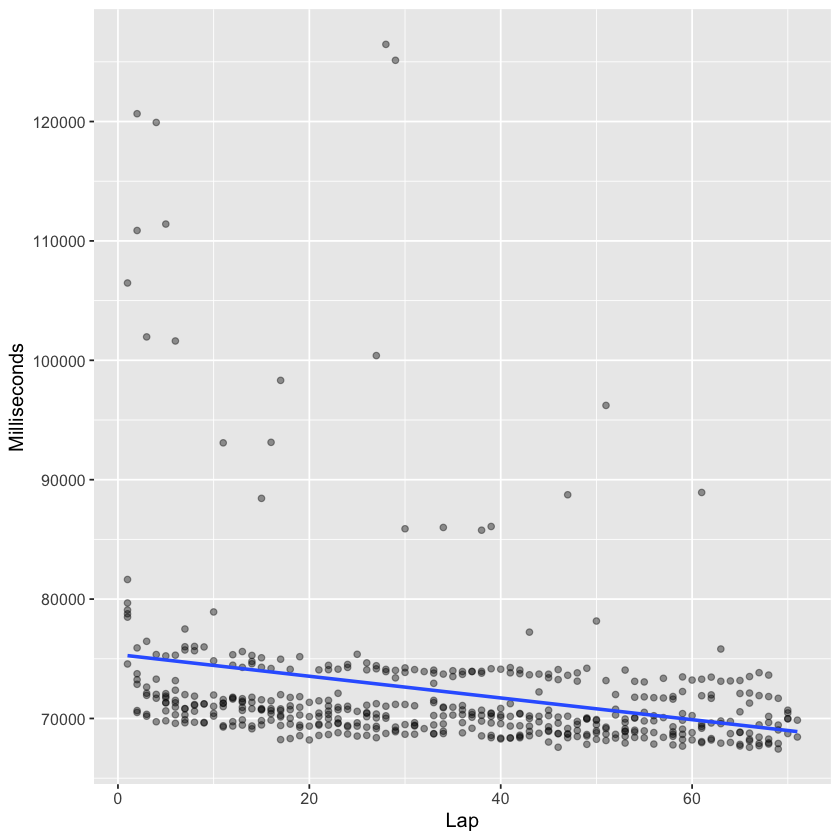

In [15]:
set.seed(2022)

#11. Austria

dr_austria <- ric_laps %>%
                filter(raceId %in% austria_race_ID) 

dr_austria_clean <- dr_austria %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

dr_austria_clean_ID <- dr_austria_clean %>%
                        pull(raceId)


### SPLITTING DATA

dr_austria_races <- ric_laps %>%
                    filter(raceId %in% dr_austria_clean_ID)

formulaone_split <- initial_split(dr_austria_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 11

initiate_rmse() 

### GETS PREDICTION

get_austria_prediction()

`geom_smooth()` using formula 'y ~ x'



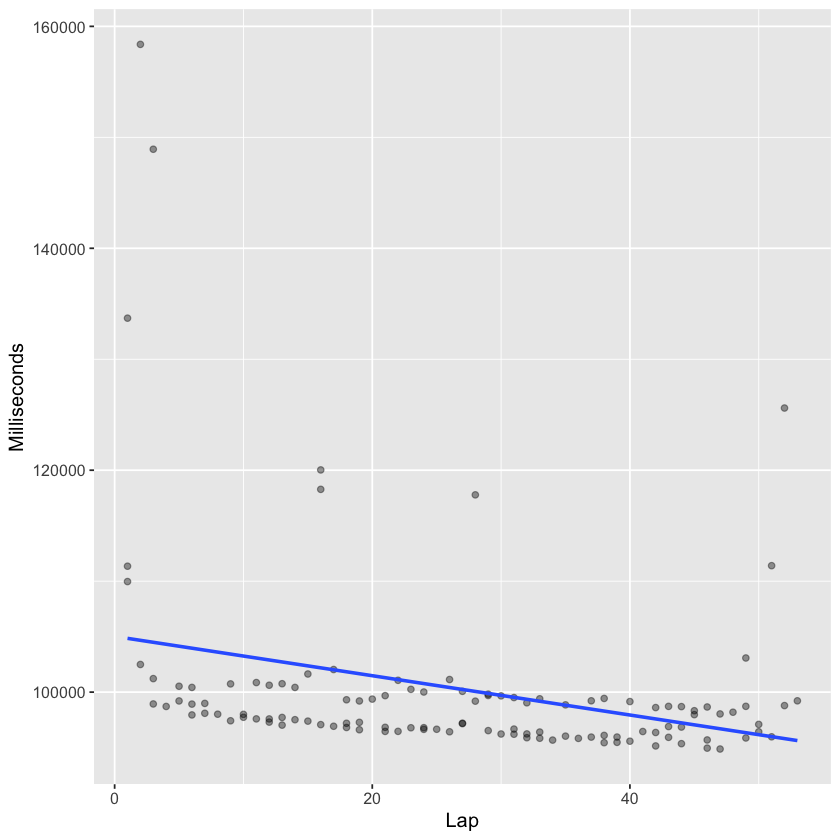

In [16]:
set.seed(2022)

#12. France

dr_france <- ric_laps %>%
                filter(raceId %in% france_race_ID) 

dr_france_clean <- dr_france %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

dr_france_clean_ID <- dr_france_clean %>%
                        pull(raceId)


### SPLITTING DATA

dr_france_races <- ric_laps %>%
                    filter(raceId %in% dr_france_clean_ID)

formulaone_split <- initial_split(dr_france_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 12

initiate_rmse() 

### GETS PREDICTION

get_france_prediction()

`geom_smooth()` using formula 'y ~ x'



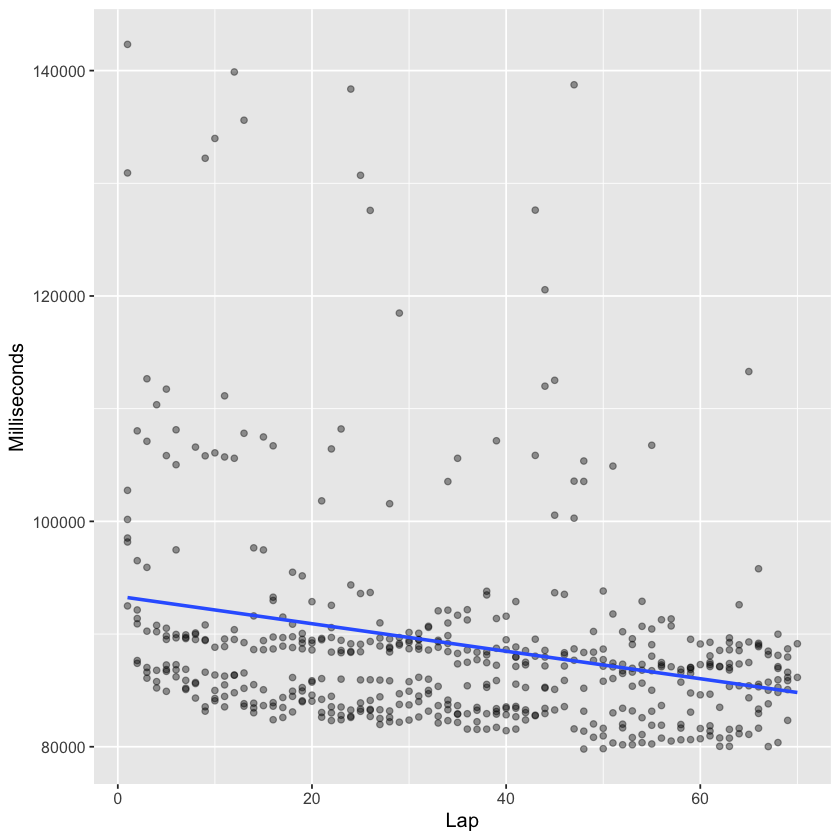

In [17]:
set.seed(2022)

#13. Hungary

dr_hungary <- ric_laps %>%
                filter(raceId %in% hungary_race_ID) 

dr_hungary_clean <- dr_hungary %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
                     

dr_hungary_clean_ID <- dr_hungary_clean %>%
                        pull(raceId)


### SPLITTING DATA

dr_hungary_races <- ric_laps %>%
                    filter(raceId %in% dr_hungary_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(dr_hungary_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 13

initiate_rmse() 

### GETS PREDICTION

get_hungary_prediction()

raceId,n
<dbl>,<int>
871,44
891,44
911,44
960,44
980,44
1037,44
1022,43
1001,28
937,19


`geom_smooth()` using formula 'y ~ x'



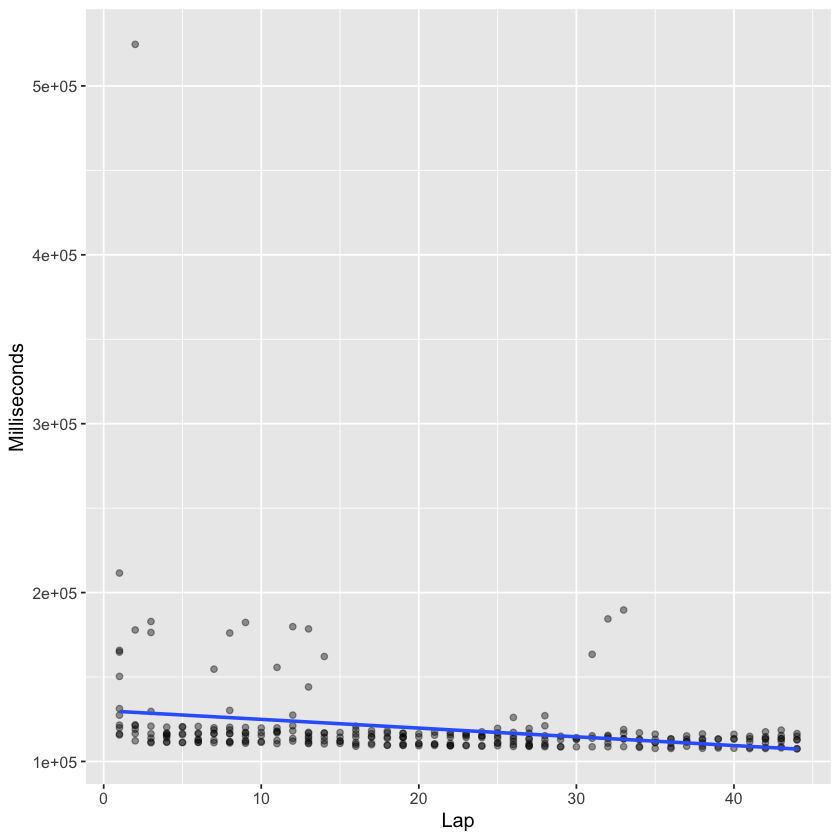

In [18]:
set.seed(2022)

#14. Belgium

dr_belgium <- ric_laps %>%
                filter(raceId %in% belgium_race_ID) 

dr_belgium_clean <- dr_belgium %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
dr_belgium_clean
dr_belgium_clean_ID <- dr_belgium_clean %>%
                        pull(raceId)


### SPLITTING DATA

dr_belgium_races <- ric_laps %>%
                    filter(raceId %in% dr_belgium_clean_ID) 

formulaone_split <- initial_split(dr_belgium_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 14

initiate_rmse() 

### GETS PREDICTION

get_belgium_prediction()

raceId,n
<dbl>,<int>
1064,71


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



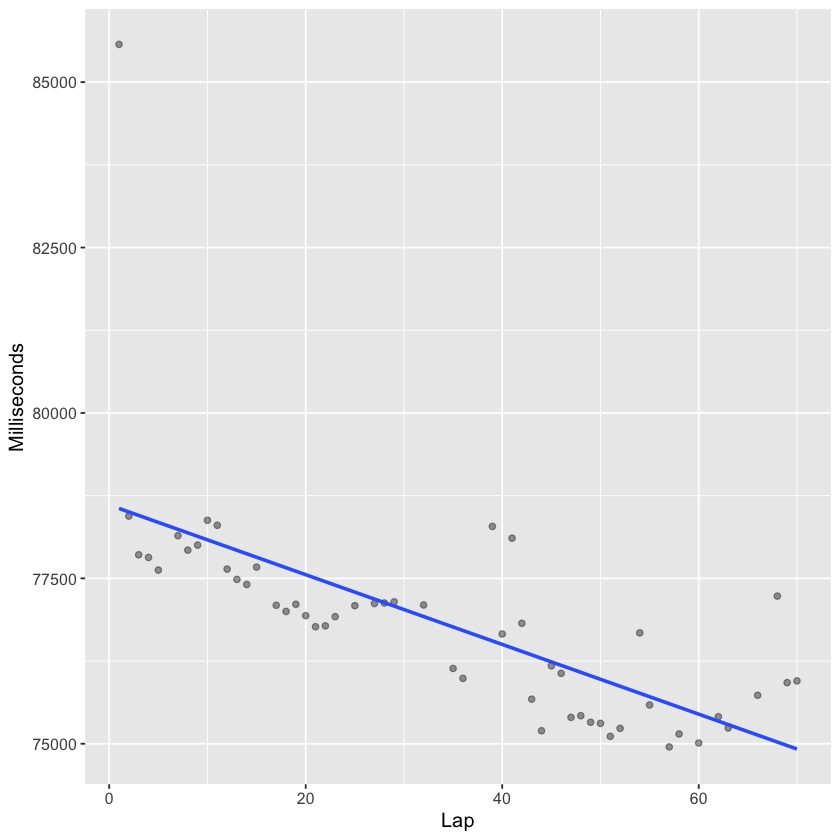

In [19]:
set.seed(2022)

#15. Netherlands

dr_netherlands <- ric_laps %>%
                filter(raceId %in% netherlands_race_ID) 

dr_netherlands_clean <- dr_netherlands %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
dr_netherlands_clean
dr_netherlands_clean_ID <- dr_netherlands_clean %>%
                        pull(raceId)


### SPLITTING DATA

dr_netherlands_races <- ric_laps %>%
                    filter(raceId %in% dr_netherlands_clean_ID) 

formulaone_split <- initial_split(dr_netherlands_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 15

initiate_rmse() 

### GETS PREDICTION

get_netherlands_prediction()

raceId,n
<dbl>,<int>
872,53
892,53
912,53
961,53
981,53
1023,53
1038,53
1065,53
938,52


`geom_smooth()` using formula 'y ~ x'



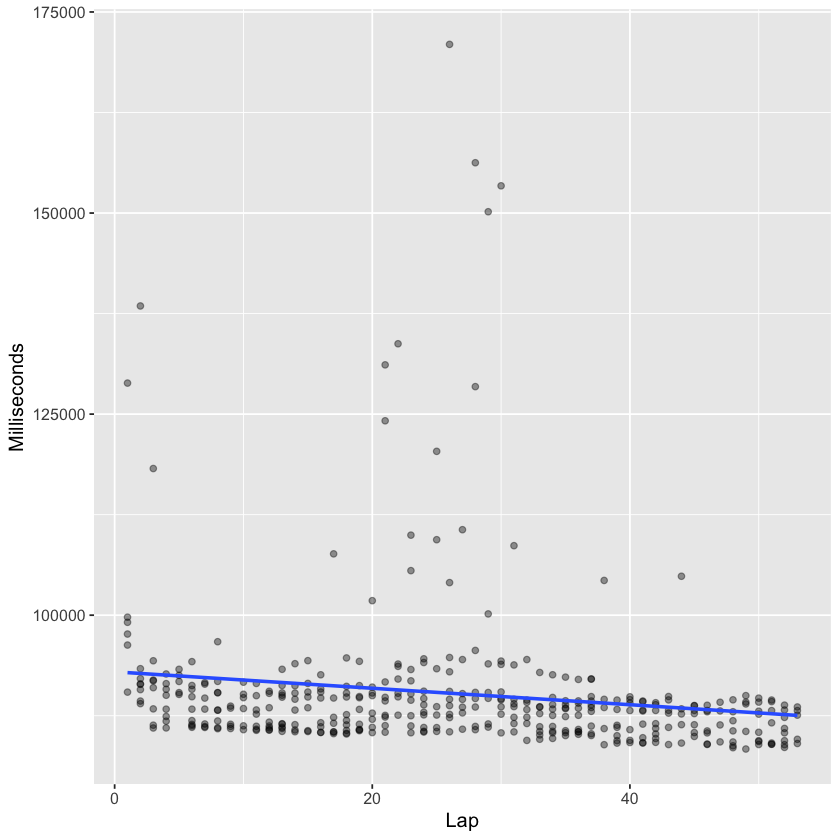

In [20]:
set.seed(2022)

#16. Italy, Monza

dr_monza <- ric_laps %>%
                filter(raceId %in% monza_race_ID) 

dr_monza_clean <- dr_monza %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
dr_monza_clean
dr_monza_clean_ID <- dr_monza_clean %>%
                        pull(raceId)


### SPLITTING DATA

dr_monza_races <- ric_laps %>%
                    filter(raceId %in% dr_monza_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(4:1000)

formulaone_split <- initial_split(dr_monza_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 16

initiate_rmse() 

### GETS PREDICTION

get_monza_prediction()

`geom_smooth()` using formula 'y ~ x'



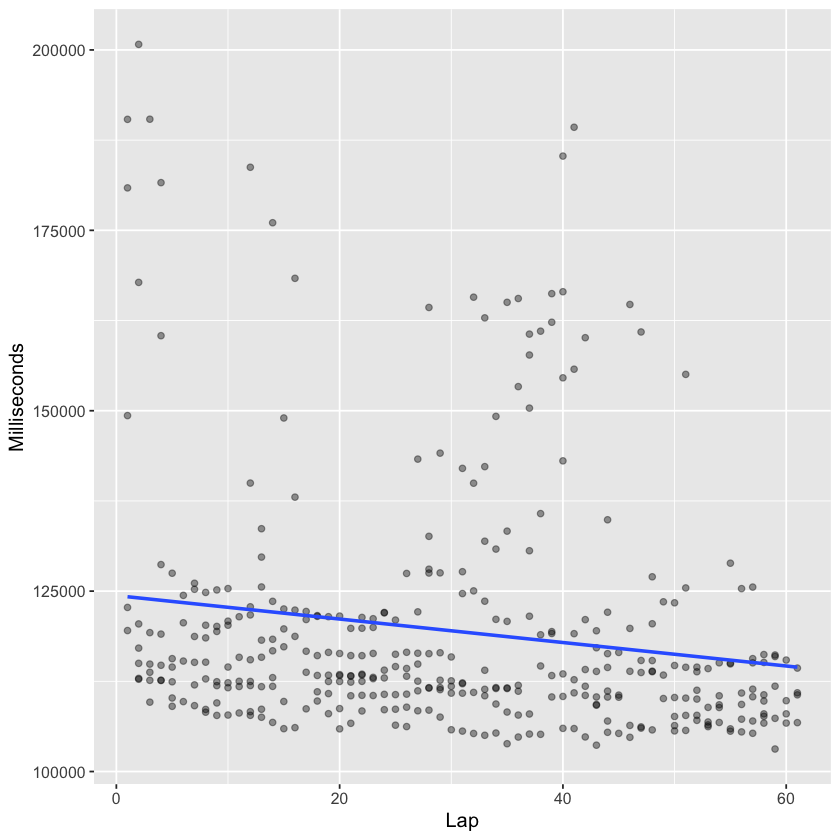

In [21]:
set.seed(2022)

#17. Singapore

dr_singapore <- ric_laps %>%
                filter(raceId %in% singapore_race_ID) 

dr_singapore_clean <- dr_singapore %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

dr_singapore_clean_ID <- dr_singapore_clean %>%
                        pull(raceId)


### SPLITTING DATA

dr_singapore_races <- ric_laps %>%
                    filter(raceId %in% dr_singapore_clean_ID)

formulaone_split <- initial_split(dr_singapore_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 17

initiate_rmse() 

### GETS PREDICTION

get_singapore_prediction()

`geom_smooth()` using formula 'y ~ x'



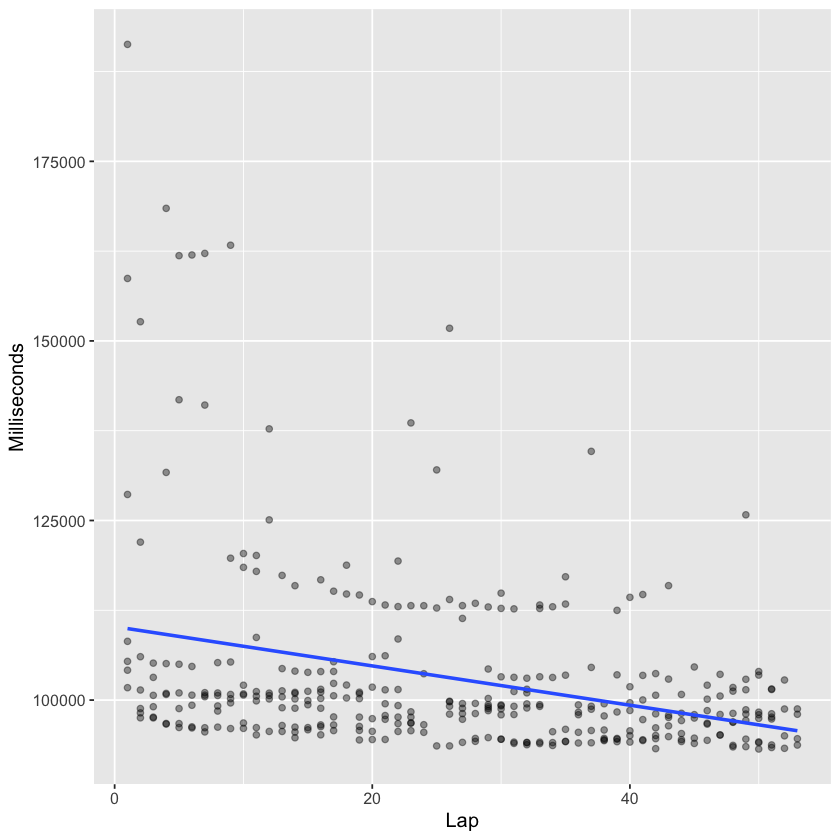

In [22]:
set.seed(2022)

#18. Japan

dr_japan <- ric_laps %>%
                filter(raceId %in% japan_race_ID) 

dr_japan_clean <- dr_japan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
dr_japan_clean_ID <- dr_japan_clean %>%
                        pull(raceId)


### SPLITTING DATA

dr_japan_races <- ric_laps %>%
                    filter(raceId %in% dr_japan_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(dr_japan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 18

initiate_rmse() 

### GETS PREDICTION

get_japan_prediction()

`geom_smooth()` using formula 'y ~ x'



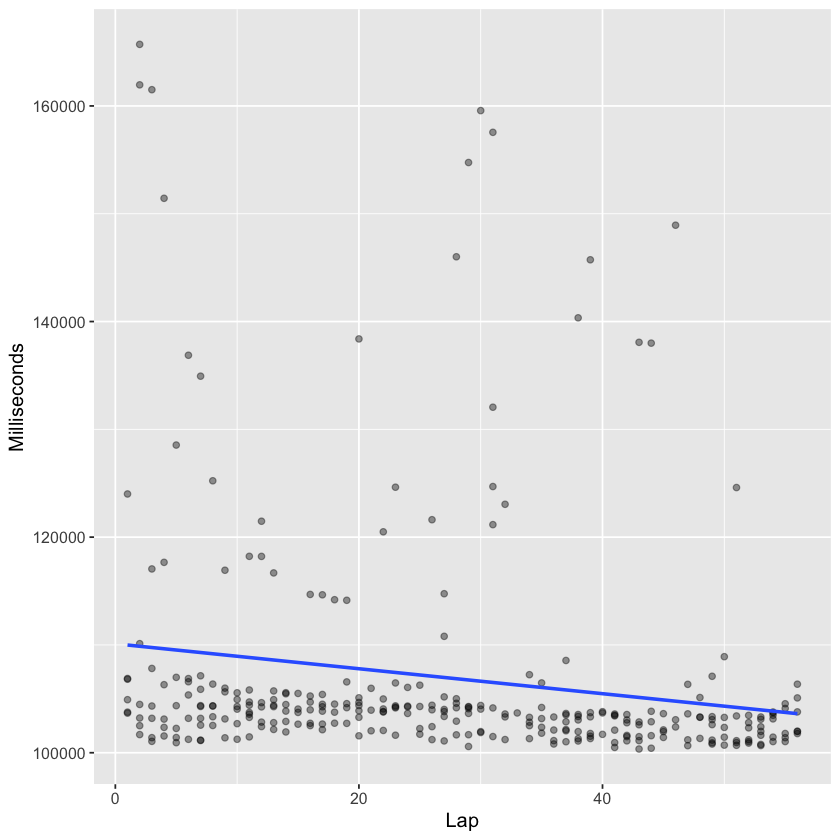

In [23]:
set.seed(2022)

#19. USA, Austin

dr_austin <- ric_laps %>%
                filter(raceId %in% austin_race_ID) 

dr_austin_clean <- dr_austin %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

dr_austin_clean_ID <- dr_austin_clean %>%
                        pull(raceId)


### SPLITTING DATA

dr_austin_races <- ric_laps %>%
                    filter(raceId %in% dr_austin_clean_ID)

formulaone_split <- initial_split(dr_austin_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 19

initiate_rmse() 

### GETS PREDICTION

get_austin_prediction()

`geom_smooth()` using formula 'y ~ x'



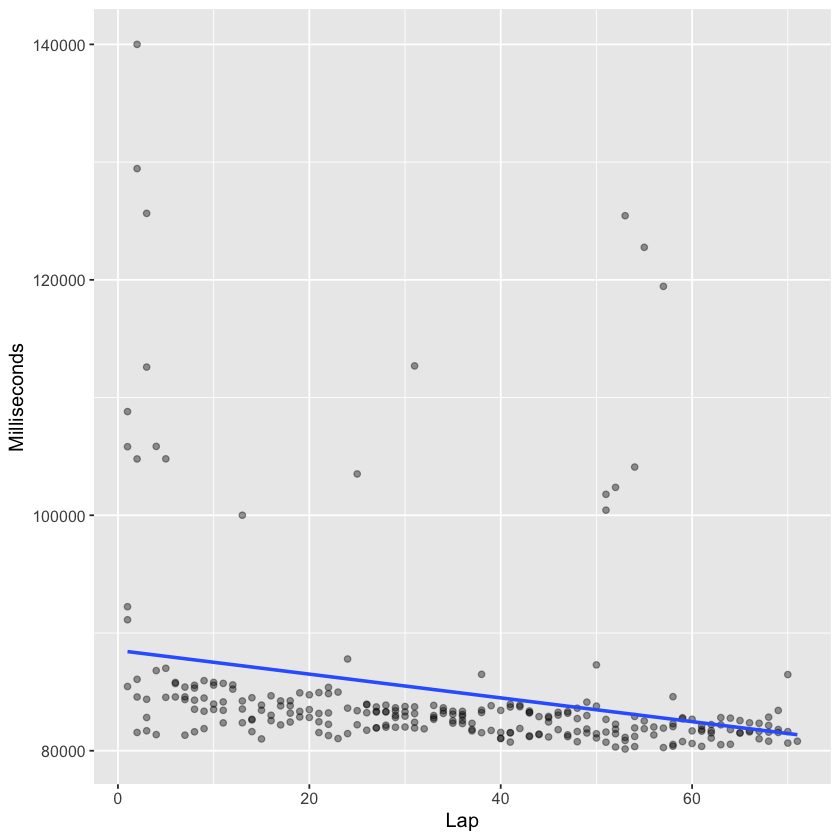

In [24]:
set.seed(2022)

#20. Mexico

dr_mexico <- ric_laps %>%
                filter(raceId %in% mexico_race_ID) 

dr_mexico_clean <- dr_mexico %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

dr_mexico_clean_ID <- dr_mexico_clean %>%
                        pull(raceId)


### SPLITTING DATA

dr_mexico_races <- ric_laps %>%
                    filter(raceId %in% dr_mexico_clean_ID)

formulaone_split <- initial_split(dr_mexico_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 20

initiate_rmse() 

### GETS PREDICTION

get_mexico_prediction()

`geom_smooth()` using formula 'y ~ x'



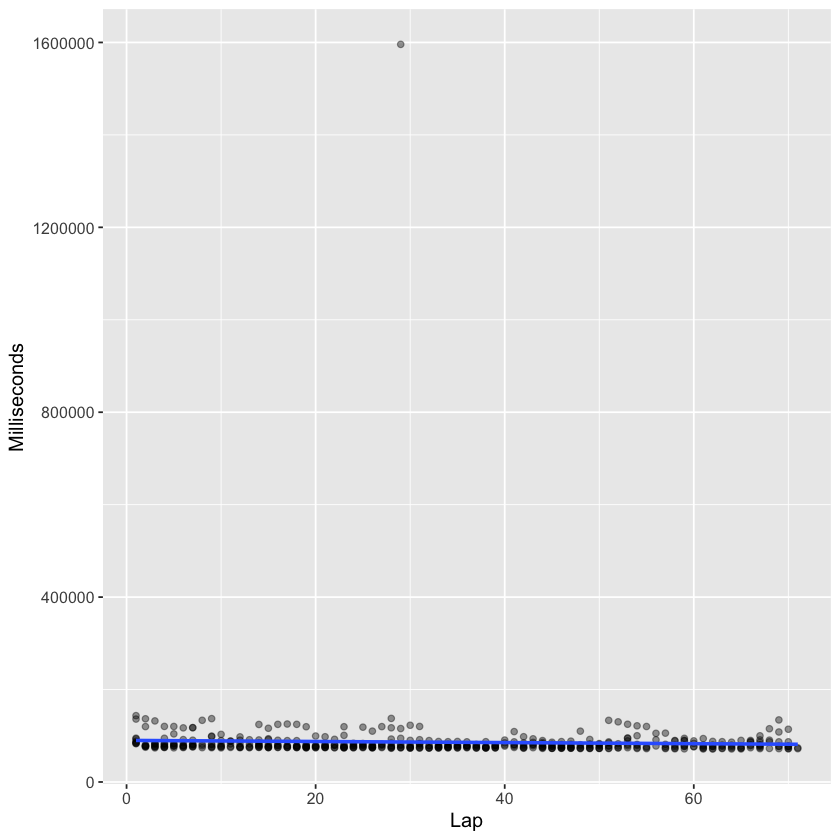

In [25]:
set.seed(2022)

#21. Brazil

dr_brazil <- ric_laps %>%
                filter(raceId %in% brazil_race_ID) 

dr_brazil_clean <- dr_brazil %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

dr_brazil_clean_ID <- dr_brazil_clean %>%
                        pull(raceId)


### SPLITTING DATA

dr_brazil_races <- ric_laps %>%
                    filter(raceId %in% dr_brazil_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(dr_brazil_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 21

initiate_rmse() 

### GETS PREDICTION

get_brazil_prediction()

`geom_smooth()` using formula 'y ~ x'



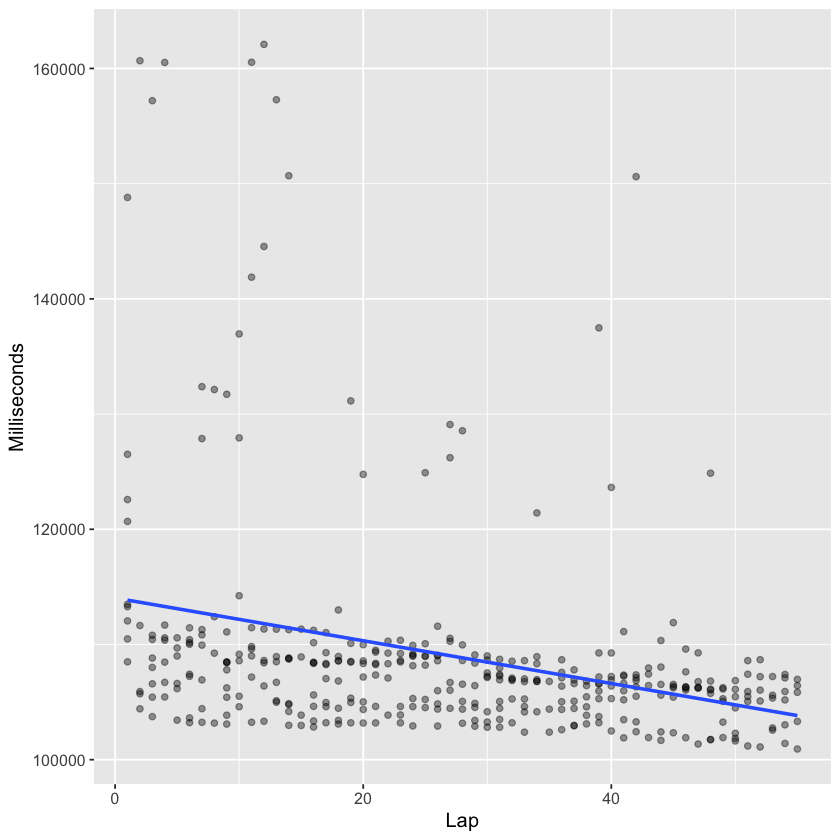

In [26]:
set.seed(2022)

#22. Abu Dhabi

dr_uae <- ric_laps %>%
                filter(raceId %in% uae_race_ID) 

dr_uae_clean <- dr_uae %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

dr_uae_clean_ID <- dr_uae_clean %>%
                        pull(raceId)


### SPLITTING DATA

dr_uae_races <- ric_laps %>%
                    filter(raceId %in% dr_uae_clean_ID)

formulaone_split <- initial_split(dr_uae_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 22

initiate_rmse() 

### GETS PREDICTION

get_uae_prediction()

## Collection

In [27]:
rmse_col
racetime_col

dr_merge <- merge(rmse_col, racetime_col)

dr_merge

write_csv(dr_merge, "final_race_data/dr_race.csv")

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>
rmse,standard,10095.581,1
rmse,standard,13147.928,2
rmse,standard,11108.782,3
rmse,standard,11621.329,4
rmse,standard,8544.944,5
rmse,standard,8483.387,6
rmse,standard,11661.086,7
rmse,standard,18904.609,8
rmse,standard,5943.822,9


race_time_milliseconds,race_time_mins,race_time_hrs,Round
<dbl>,<dbl>,<dbl>,<dbl>
5780713,96.34522,1.605754,1
5574360,92.90600,1.548433,2
5512224,91.87041,1.531173,3
5602576,93.37627,1.556271,4
5797666,96.62777,1.610463,5
5927147,98.78579,1.646430,6
6467377,107.78962,1.796494,7
6266952,104.44921,1.740820,8
5628230,93.80384,1.563397,9


Round,.metric,.estimator,.estimate,race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,rmse,standard,10095.581,5780713,96.34522,1.605754
2,rmse,standard,13147.928,5574360,92.90600,1.548433
3,rmse,standard,11108.782,5512224,91.87041,1.531173
4,rmse,standard,11621.329,5602576,93.37627,1.556271
5,rmse,standard,8544.944,5797666,96.62777,1.610463
6,rmse,standard,8483.387,5927147,98.78579,1.646430
7,rmse,standard,11661.086,6467377,107.78962,1.796494
8,rmse,standard,18904.609,6266952,104.44921,1.740820
9,rmse,standard,5943.822,5628230,93.80384,1.563397
